### Import Libraries and Module

In [1]:
import glob
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

### Combine Lagos, Abuja and Port-harcourt Datasets and write to csv file

In [2]:
directory = r"/home/hildred/Desktop/Ustacky_PROJECTS/Data-Analysis-Project"
files = glob.glob(directory + "/*.csv")

In [3]:
file_list = []
for file in files:
    read_file = pd.read_csv(file, index_col=None, header=0)
    file_list.append(read_file)

In [4]:
print(files)

['/home/hildred/Desktop/Ustacky_PROJECTS/Data-Analysis-Project/Lagos_Branch.csv', '/home/hildred/Desktop/Ustacky_PROJECTS/Data-Analysis-Project/Abuja_Branch.csv', '/home/hildred/Desktop/Ustacky_PROJECTS/Data-Analysis-Project/Port_Harcourt_Branch.csv']


In [5]:
data = pd.concat(file_list, axis=0, ignore_index=True)

In [6]:
sort_data = data.sort_values(by = ['Branch']).reset_index(drop=True)

In [7]:
sort_data.to_csv('supermarket_data.csv', index=False)

### Data Exploration

In [8]:
s_data = pd.read_csv("supermarket_data.csv")

In [9]:
s_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,305-03-2383,A,Lagos,Normal,Female,Food and beverages,24156.0,3,3623.40,76091.40,2/15/2019,10:36,Cash,72468.0,4.761905,3623.40,7.5
2,648-83-1321,A,Lagos,Member,Male,Home and lifestyle,22881.6,10,11440.80,240256.80,1/16/2019,17:59,Cash,228816.0,4.761905,11440.80,4.3
3,105-10-6182,A,Lagos,Member,Male,Fashion accessories,7732.8,2,773.28,16238.88,2/27/2019,12:22,Epay,15465.6,4.761905,773.28,6.6
4,130-67-4723,A,Lagos,Member,Male,Food and beverages,17460.0,6,5238.00,109998.00,1/11/2019,13:57,Epay,104760.0,4.761905,5238.00,9.4


In [10]:
s_data.shape

(1000, 17)

In [11]:
s_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
s_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


## Inferences from statistical summary of supermarket data
#### ◘ Customers purchased an average of 5 products on each patronage
#### ◘ The cheapest item in all stores is about 3,630 naira while the most expensive is about 40,000 naira
#### ◘ Customer satisfaction across all stores is above average
#### ◘ There are no outliers in the data provided


In [13]:
s_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [14]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Working with DateTime

#### • Convert Date

In [15]:
s_data['Date'] = pd.to_datetime(s_data['Date'])

In [16]:
s_data['Date'].dtype

dtype('<M8[ns]')

#### • Convert Time 

In [17]:
s_data["Time"] = pd.to_datetime(s_data['Time'], errors='coerce')

#### • Extract Days

In [18]:
s_data['Day'] = s_data['Date'].dt.day

#### • Extract Months

In [19]:
s_data['Month'] = s_data['Date'].dt.month

#### • Extract Year

In [20]:
s_data["Year"] = s_data['Date'].dt.year

#### • Extract Hour

In [21]:
s_data['Hour'] = s_data['Time'].dt.hour 

In [22]:
s_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,...,2021-06-21 13:08:00,Epay,188218.8,4.761905,9410.94,9.1,5,1,2019,13
1,305-03-2383,A,Lagos,Normal,Female,Food and beverages,24156.0,3,3623.40,76091.40,...,2021-06-21 10:36:00,Cash,72468.0,4.761905,3623.40,7.5,15,2,2019,10
2,648-83-1321,A,Lagos,Member,Male,Home and lifestyle,22881.6,10,11440.80,240256.80,...,2021-06-21 17:59:00,Cash,228816.0,4.761905,11440.80,4.3,16,1,2019,17
3,105-10-6182,A,Lagos,Member,Male,Fashion accessories,7732.8,2,773.28,16238.88,...,2021-06-21 12:22:00,Epay,15465.6,4.761905,773.28,6.6,27,2,2019,12
4,130-67-4723,A,Lagos,Member,Male,Food and beverages,17460.0,6,5238.00,109998.00,...,2021-06-21 13:57:00,Epay,104760.0,4.761905,5238.00,9.4,11,1,2019,13


#### • Unique sales hours

In [23]:
s_data["Hour"].unique()

array([13, 10, 17, 12, 18, 19, 15, 14, 20, 16, 11])

## Unique values and number of unique values in categorical columns

#### • City

In [24]:
s_data['City'].unique()

array(['Lagos', 'Abuja', 'Port Harcourt'], dtype=object)

In [25]:
s_data['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

#### • Customer type

In [26]:
s_data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [27]:
s_data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

#### • Gender

In [28]:
s_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
s_data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

#### • Product line

In [30]:
s_data['Product line'].unique()

array(['Health and beauty', 'Food and beverages', 'Home and lifestyle',
       'Fashion accessories', 'Electronic accessories',
       'Sports and travel'], dtype=object)

In [31]:
s_data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

#### • Payment

In [32]:
s_data['Payment'].unique()

array(['Epay', 'Cash', 'Card'], dtype=object)

In [33]:
s_data['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Aggregation

In [34]:
city_groups = s_data.groupby('City')

In [35]:
total_agg = city_groups.agg(["sum", "mean"]).round(2)

In [36]:
total_agg

Unit price           Quantity            Tax 5%           \
                     sum      mean      sum  mean         sum     mean   
City                                                                     
Abuja          6652396.8  20037.34     1820  5.48  1820531.52  5483.53   
Lagos          6705176.4  19721.11     1859  5.47  1820577.78  5354.64   
Port Harcourt  6684393.6  20379.25     1831  5.58  1895463.54  5778.85   

                     Total                   cogs             ...  Rating  \
                       sum       mean         sum       mean  ...     sum   
City                                                          ...           
Abuja          38231161.92  115154.10  36410630.4  109670.57  ...  2263.6   
Lagos          38232133.38  112447.45  36411555.6  107092.81  ...  2389.2   
Port Harcourt  39804734.34  121355.90  37909270.8  115577.05  ...  2319.9   

                      Day        Month          Year        Hour         
               mean   sum   mean   sum  mean     sum  mean   sum   mean  
City                                                                     
Abuja          6.82  5068  15.27   665  2.00  670308  2019  5029  15.15  
Lagos          7.03  5232  15.39   688  2.02  686460  2019  4987  14.67  
Port Harcourt  7.07  4956  15.11   640  1.95  662232  2019  4894  14.92  

[3 rows x 24 columns]

#### • Gross Income


In [37]:
gross_agg = city_groups.agg({'gross income': 'sum'}).round(2)

In [38]:
gross_agg

,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


#### • City with the highest gross income

In [39]:
gross_agg.loc[gross_agg['gross income'] == gross_agg['gross income'].max()]

,gross income
City,
Port Harcourt,1895463.54


# Data Visualization

#### • Branch total sales record

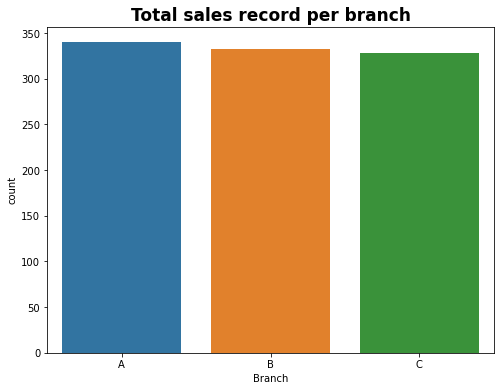

In [40]:
plt.figure(figsize= (8,6))
ts_plot = sb.countplot(x="Branch",data=s_data)
ts_plot.set_title("Total sales record per branch", fontdict= {"fontsize": 17, "fontweight": "bold"})
plt.show()

###### ‣Branch with highest sales record is  branch A

#### • Highest & Lowest sold product line

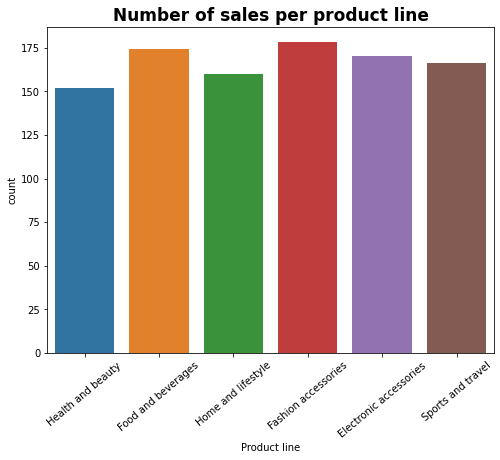

In [41]:
plt.figure(figsize= (8,6))
p_line_plot = sb.countplot(x="Product line",data=s_data)
p_line_plot.set_title("Number of sales per product line", fontdict = {"fontsize": 17, "fontweight": "bold"})
plt.setp(p_line_plot.get_xticklabels(), rotation=40)
plt.show()

###### ‣Highest sold product line is Fashion accessories
###### ‣Lowest sold product line is  Health and beauty

#### • Most used payment channel

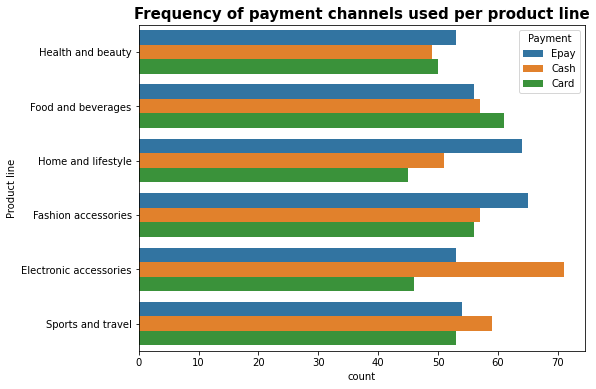

In [42]:
plt.figure(figsize= (8,6))
pc_plot = sb.countplot(y = "Product line" ,data=s_data, hue = "Payment")
pc_plot.set_title("Frequency of payment channels used per product line", fontdict = {"fontsize": 15, "fontweight": "bold"})
plt.show()

###### ‣ Epay was mostly used for payment by customers for Health and beauty, Home and lifestyle and Fashion accessories
###### ‣ Cash was mostly used for payment by customers for Electronic accessories and Sports and travel products
###### ‣ Card payment was the most used payment channel only for Food and beverages

#### • Payment channel for each branch

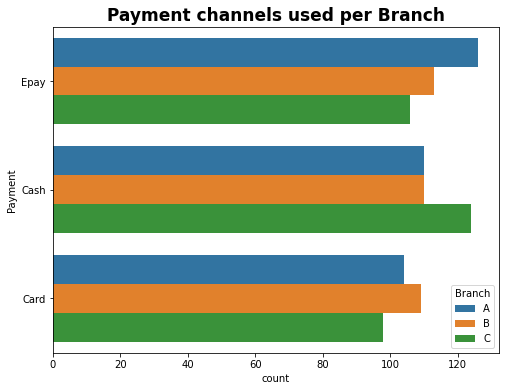

In [43]:
plt.figure(figsize= (8,6))
bpc_plot = sb.countplot(y = "Payment", data = s_data, hue = "Branch")
bpc_plot.set_title("Payment channels used per Branch", fontdict = {"fontsize": 17, "fontweight": "bold"})
plt.show()

###### ‣ Epay was most used for payments in Branch A (Lagos)
###### ‣ Cash was most used for payments in Branch C (Port Harcourt)
###### ‣ Card was most used for payments in Branch B (Abuja)

#### • Branch with the lowest rating

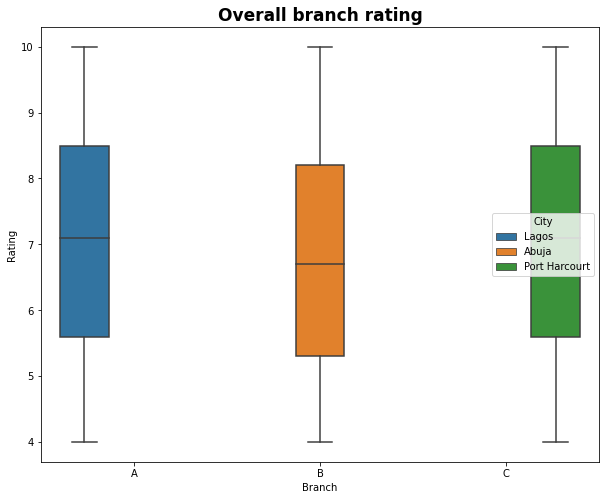

In [44]:
plt.figure(figsize= (10, 8))
r_plot = sb.boxplot(x = "Branch", y = "Rating", hue = "City", data = s_data)
r_plot.set_title("Overall branch rating", fontdict = {"fontsize": 17, "fontweight": "bold"})
plt.show()

###### ‣Abuja (Branch B), recorded the lowest rating

#### • Product line purchased by gender

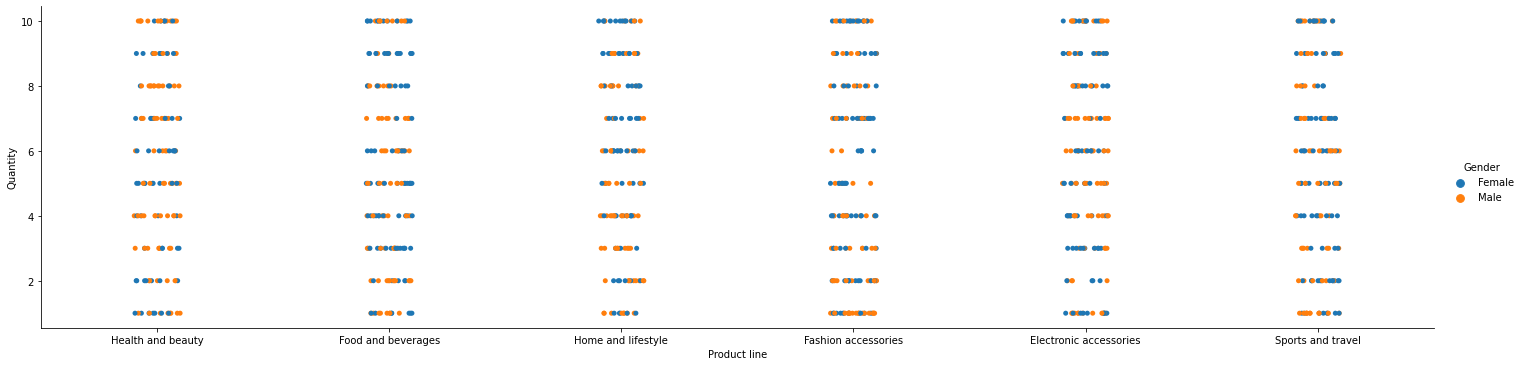

In [45]:
gp_plot = sb.catplot(x = "Product line", y = "Quantity", hue = "Gender", data = s_data, aspect = 4)
plt.show()

###### ‣ Males purchased more Health and beauty products than females
###### ‣ Females purchased more quantites of all other product lines

#### • Product line total sales by gender

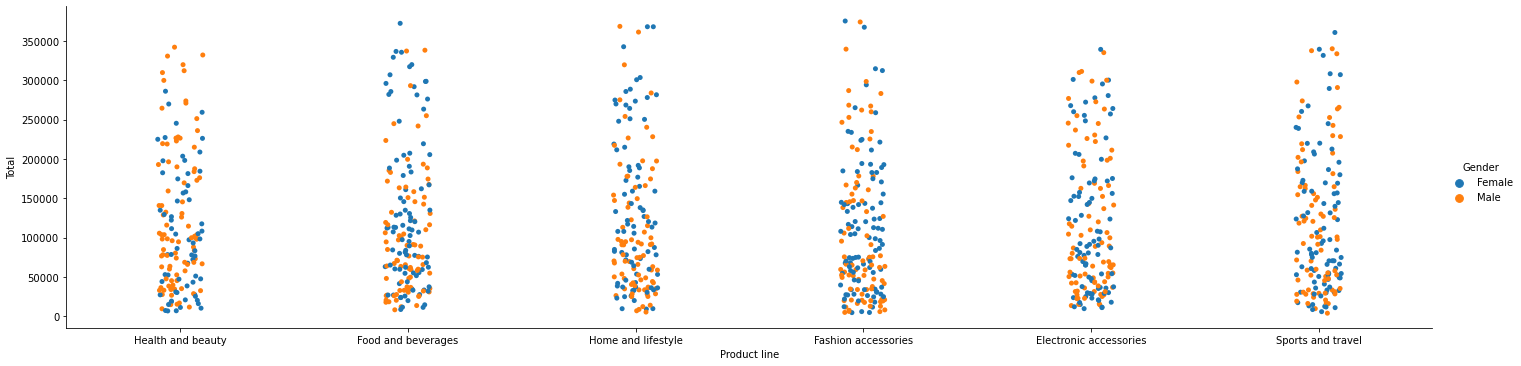

In [46]:
sb.catplot(x = "Product line", y = "Total", hue = "Gender", data = s_data, aspect = 4)
plt.show()

###### ‣ Information from this plot, is consistent with the plot on gender influenced purchases
###### ‣ Total sales on Health and beauty products purchased by males was higher than females
###### ‣ Total sales on other product lines purchased by females was higher than males

#### • Product line per unit price

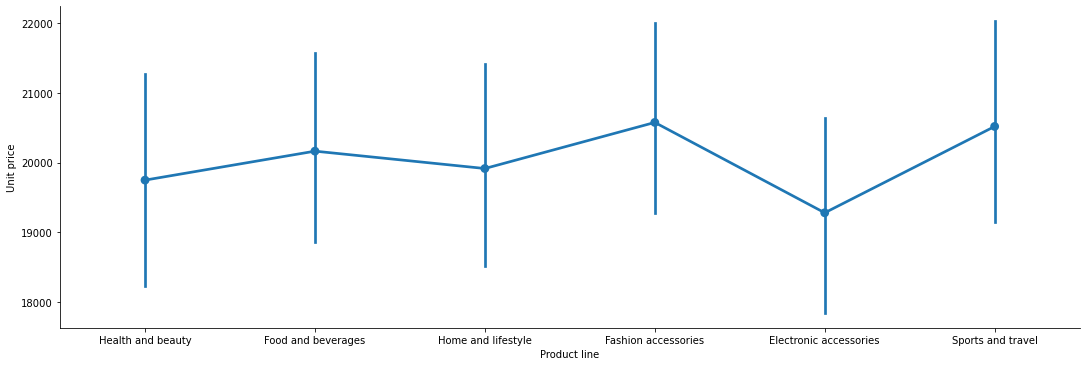

In [47]:
ppp_plot = sb.catplot(x = "Product line", y = "Unit price", data = s_data, kind= "point", aspect = 3)
plt.show()

###### ‣ The distribution of unit prices in Sports and travel has the highest values, followed closely, by Fashion accessories

#### • Product line per quantity

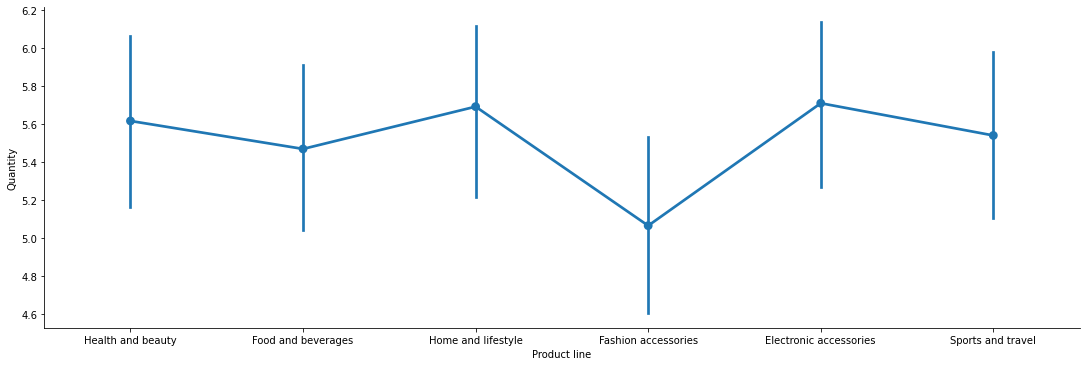

In [48]:
sb.catplot(x= "Product line", y= "Quantity", data = s_data, kind = "point", aspect = 3)
plt.show()

###### ‣ As opposed to the information on unit prices of product lines, the distribution in the quantity purchased in Fashion accessories, includes the most frequently occurring lowest values

## STANDOUT SECTION

#### • Tax generated per product line

In [49]:
p_grps = s_data.groupby("Product line")
tax_agg = p_grps.agg({"Tax 5%": "sum"})
tax_agg = tax_agg.nlargest(6, "Tax 5%")

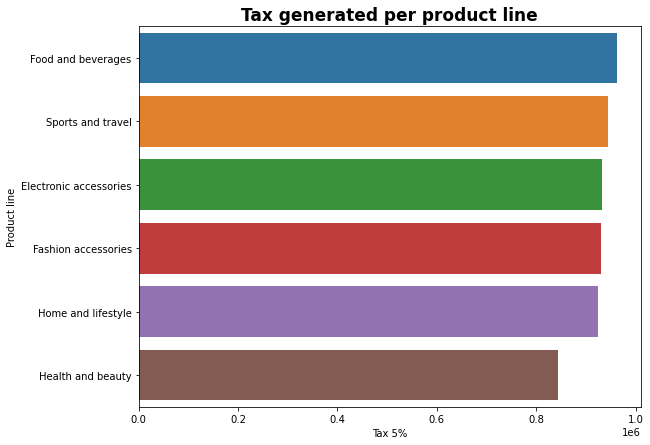

In [50]:
plt.figure(figsize = (9,7))
tplot = sb.barplot(x= "Tax 5%", y = tax_agg.index, data = tax_agg)
tplot.set_title("Tax generated per product line", fontdict = {"fontsize": 17, "fontweight": "bold"})
plt.show()

###### ‣ Food and beverages generated the highest tax
###### ‣ Health and beauty generated the least tax

#### • Monthly Quantity Sold per Branch

In [51]:
lag_data = s_data[s_data["City"] == "Lagos"]
lag_grp = lag_data.groupby("Month")
agg_lag = lag_grp.agg({"Total": "sum"})
agg_lag.rename(columns = {"Total": "Lagos"}, inplace = True)

In [52]:
abj_data = s_data[s_data["City"] == "Abuja"]
abj_grp = abj_data.groupby("Month")
agg_abj = abj_grp.agg({"Total": "sum"})
agg_abj.rename(columns = {"Total": "Abuja"}, inplace = True)

In [53]:
ph_data = s_data[s_data["City"] == "Port Harcourt"]
ph_grp = ph_data.groupby("Month")
agg_ph = ph_grp.agg({"Total": "sum"})
agg_ph.rename(columns = {"Total": "Port Harcourt"}, inplace = True)

In [54]:
merge = pd.merge(agg_lag, agg_abj, on = "Month")
merge_months = pd.merge(merge, agg_ph, on = "Month")
merge_months.rename(index = {1:"January", 2:"February", 3:"March"}, inplace = True)
merge_months = merge_months.reset_index()

In [55]:
Q_months = pd.melt(merge_months, id_vars=["Month"], var_name="City", value_name="Total sales")

In [56]:
Q_months

,Month,City,Total sales
0,January,Lagos,13925206.26
1,February,Lagos,10749643.38
2,March,Lagos,13557283.74
3,January,Abuja,13383381.06
4,February,Abuja,12392737.56
5,March,Abuja,12455043.30
6,January,Port Harcourt,14556485.16
7,February,Port Harcourt,11856593.70
8,March,Port Harcourt,13391655.48


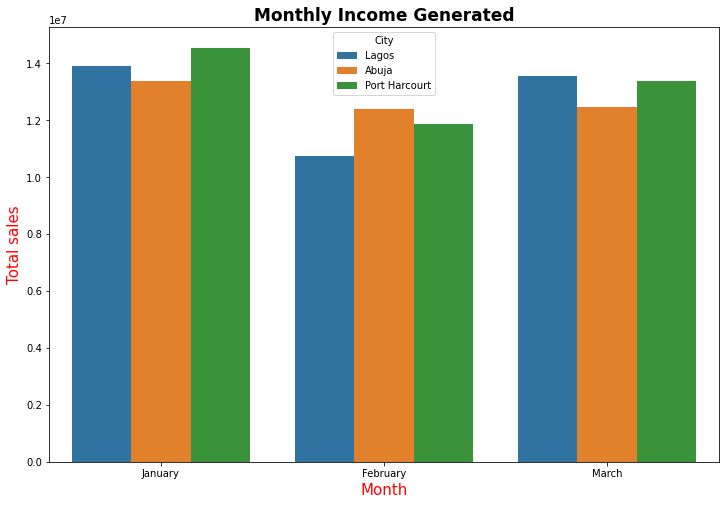

In [57]:
plt.figure(figsize = (12,8))
month_plot = sb.barplot(x = "Month", y = "Total sales", hue= "City", data = Q_months)
month_plot.set_title("Monthly Income Generated", fontdict = {"fontsize": 17, "fontweight": "bold"})
month_plot.set_xlabel("Month", size = 15, color= "r")
month_plot.set_ylabel("Total sales", size = 15, color= "r")
plt.show()

###### ‣ In January, Port harcourt branch, generated the most total income
###### ‣ In February, Abuja branch, generated the most total income
###### ‣ In January, Lagos branch, generated the most total income